### 2015 Airline Delays and Cancellations

#### Data: https://www.kaggle.com/usdot/flight-delays#flights.csv
#### Sheetal Laad

##### Import packages

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
#mpl_toolkits = importlib.import_module('mpl_toolkits')
from mpl_toolkits.basemap import Basemap
from PIL import Image
from matplotlib.lines import Line2D
import mpld3
import datetime as dt
import seaborn as sn
%matplotlib inline
#%mpld3 inline

##### Import data

In [3]:
flights = pd.read_csv('flights.csv')
airports = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')

/Applications/anaconda3/envs/testbm2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##### Clean data

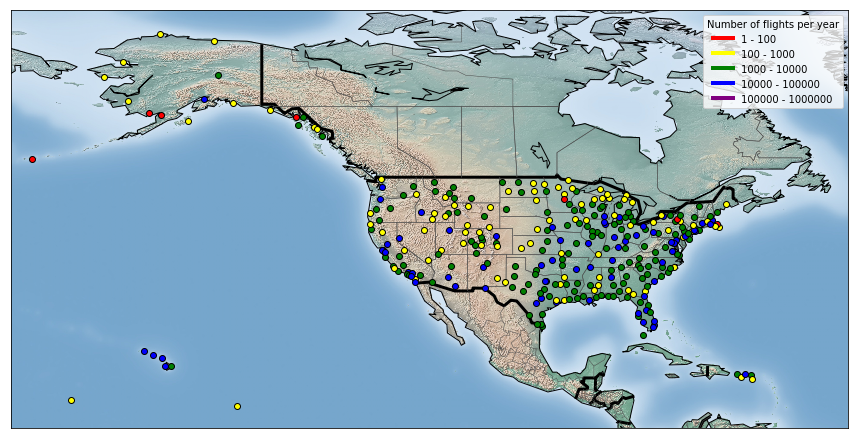

In [6]:
#Create Flight Counts
flight_counts = pd.DataFrame(flights.ORIGIN_AIRPORT.value_counts())
flight_counts.columns = ['COUNT']
colors = ['red', 'yellow', 'green', 'blue', 'purple']
size_limits = [1, 100, 1000, 10000, 100000, 1000000]

airport_flightcounts = pd.merge(airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']], flight_counts, 
                                how = 'left', left_on = 'IATA_CODE', right_index = True)
#Graph Flight Counts on Map
fig,ax = plt.subplots(figsize = (15, 15))

map = Basemap(llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth = 3)
map.drawstates(color='0.3')

isizes = []
for index, (code, y, x, count) in airport_flightcounts.iterrows():
    if count < size_limits[1]: isize = colors[0]
    elif count < size_limits[2]: isize = colors[1]
    elif count < size_limits[3]: isize = colors[2] 
    elif count < size_limits[4]: isize = colors[3]
    else: colors[4]
    isizes.append(isize)

airport_flightcounts['COLOR'] = isizes
airport_flightcounts.head()

# hov_labels = []
for index, (code, y, x, count, color) in airport_flightcounts.iterrows():
    map.plot(x, y, marker='o', markeredgewidth = 1,
             markeredgecolor='k', color = color)
#     hov_label = '%f, %f' %(x,y)
#     hov_labels.append(hov_label)
#Add legend
leg_labels = []
for i in range(len(size_limits) - 1):
    leg_label = '%s - %s' %(str(size_limits[i]), str(size_limits[i+1]))
    leg_labels.append(leg_label)
    

custom_lines = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='yellow', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='purple', lw=4)]

plt.legend(custom_lines, leg_labels, title='Number of flights per year')
plt.show()
#Handles
# tooltip = mpld3.plugins.PointLabelTooltip(map, labels=hov_labels)
# mpld3.plugins.connect(fig, tooltip)
#mpld3.show()

In [49]:
def format_time(time):
    if pd.isnull(time):
        return np.nan
    else:
        if time == 2400: time = 0
        time = "{0:04d}".format(int(time))
        h = time[:2]
        m = time[2:4]
        formatted_time = dt.time(int(h), int(m))
        return formatted_time

def format_datetime(date, time):
    if pd.isnull(date) or pd.isnull(time):
        return np.nan
    else:
        return pd.datetime.combine(date, time)

In [62]:
flights_J = flights[flights.MONTH == 1]
flights_J['DATE'] = pd.to_datetime(flights_J[['YEAR','MONTH', 'DAY']])
flights_J['SCHEDULED_DEPARTURE'] = flights_J.apply(lambda r: format_datetime(r.DATE, format_time(r.SCHEDULED_DEPARTURE)), axis = 1)
flights_J['DEPARTURE_TIME'] = flights_J.apply(lambda r: format_time(r.DEPARTURE_TIME), axis=1)
flights_J['SCHEDULED_ARRIVAL'] = flights_J.apply(lambda r: format_time(r.SCHEDULED_ARRIVAL), axis=1)
flights_J['ARRIVAL_TIME'] = flights_J.apply(lambda r: format_time(r.ARRIVAL_TIME), axis=1)
flights_J[['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
             'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']].head()

/Applications/anaconda3/envs/testbm2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/envs/testbm2/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/envs/testbm2/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
0,2015-01-01 00:05:00,04:30:00,23:54:00,04:08:00,-11.0,-22.0
1,2015-01-01 00:10:00,07:50:00,00:02:00,07:41:00,-8.0,-9.0
2,2015-01-01 00:20:00,08:06:00,00:18:00,08:11:00,-2.0,5.0
3,2015-01-01 00:20:00,08:05:00,00:15:00,07:56:00,-5.0,-9.0
4,2015-01-01 00:25:00,03:20:00,00:24:00,02:59:00,-1.0,-21.0


In [63]:
flights_J = flights_J[['AIRLINE', 'ORIGIN_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME']]
flights_J.head()

,AIRLINE,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME
0,AS,ANC,2015-01-01 00:05:00,23:54:00,-11.0,04:30:00,04:08:00,-22.0,205.0,194.0
1,AA,LAX,2015-01-01 00:10:00,00:02:00,-8.0,07:50:00,07:41:00,-9.0,280.0,279.0
2,US,SFO,2015-01-01 00:20:00,00:18:00,-2.0,08:06:00,08:11:00,5.0,286.0,293.0
3,AA,LAX,2015-01-01 00:20:00,00:15:00,-5.0,08:05:00,07:56:00,-9.0,285.0,281.0
4,AS,SEA,2015-01-01 00:25:00,00:24:00,-1.0,03:20:00,02:59:00,-21.0,235.0,215.0


In [272]:
airline_codes = dict()
for code,airline in airlines.iterrows():
    airline_codes[airline[0]] = airline[1]
airline_codes    

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

In [77]:
airline_mean = flights_J.DEPARTURE_DELAY.groupby(flights_J.AIRLINE).mean()
airline_min = flights_J.DEPARTURE_DELAY.groupby(flights_J.AIRLINE).min()
airline_max = flights_J.DEPARTURE_DELAY.groupby(flights_J.AIRLINE).max()
airline_count = flights_J.DEPARTURE_DELAY.groupby(flights_J.AIRLINE).count()

delay_stats = pd.DataFrame({'count': airline_count, 'mean': airline_mean, 'min': airline_min, 'max': airline_max})
delay_stats.sort_values('count')

,count,mean,min,max
AIRLINE,,,,
VX,4651,6.910772,-20.0,397.0
HA,6418,1.310065,-26.0,1003.0
F9,6745,17.984433,-32.0,696.0
NK,8647,13.146294,-28.0,557.0
AS,13198,3.178209,-47.0,538.0
B6,20531,10.035556,-27.0,500.0
MQ,27670,16.081207,-29.0,780.0
US,32552,5.197315,-26.0,638.0
UA,37454,14.010359,-40.0,886.0


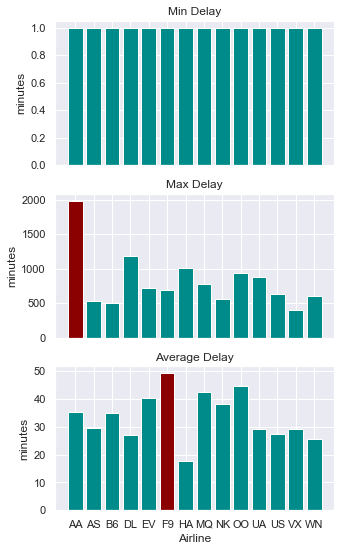

In [260]:
#Mean delay of airline
data_mean = flights_J[flights_J.DEPARTURE_DELAY > 0.0].DEPARTURE_DELAY.groupby(flights_J.AIRLINE).mean()
data_min = flights_J[flights_J.DEPARTURE_DELAY > 0.0].DEPARTURE_DELAY.groupby(flights_J.AIRLINE).min()
data_max = flights_J[flights_J.DEPARTURE_DELAY > 0.0].DEPARTURE_DELAY.groupby(flights_J.AIRLINE).max()

fig, ax = plt.subplots(3, figsize = (5, 9), sharex=True, sharey=False)

ax[0].bar(data_min.index, data_min.values, color = ['darkcyan' for i in data_min.index])
ax[0].set_title('Min Delay')
ax[0].set_ylabel('minutes')

ax[1].bar(data_max.index, data_max.values, color = ['darkred' if i == np.argmax(data_max) else 'darkcyan' for i in data_max.index])
ax[1].set_title('Max Delay')
ax[1].set_ylabel('minutes')

ax[2].bar(data_mean.index, data_mean.values, color = ['darkred' if i == np.argmax(data_mean) else 'darkcyan' for i in data_mean.index])
ax[2].set_title('Average Delay')
ax[2].set_ylabel('minutes')

plt.xlabel('Airline')


plt.show()

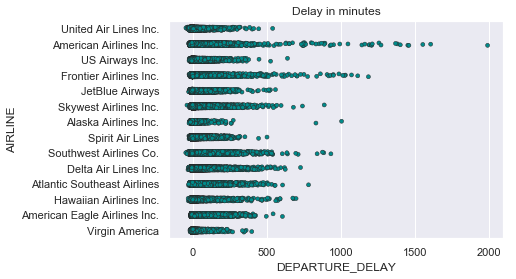

In [295]:
fig, ax = plt.subplots()
sn.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size = 4, color = 'darkcyan',
                    data=flights_J, linewidth = 0.5,  jitter=True)
ax.set_yticklabels(airline_codes.values())
plt.title('Delay in minutes')
plt.show()

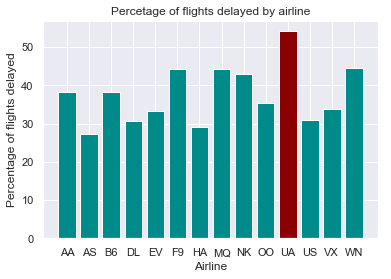

In [159]:
#Percentages of delays
sn.set(style="darkgrid")
data = (flights_J[flights_J.DEPARTURE_DELAY > 0].DEPARTURE_DELAY.groupby(flights_J.AIRLINE).count()/flights_J.DEPARTURE_DELAY.groupby(flights_J.AIRLINE).count())*100
plt.bar(data.index, data.values, color = ['darkred' if i == np.argmax(data) else 'darkcyan' for i in data.index])
plt.xlabel('Airline')
plt.ylabel('Percentage of flights delayed')
plt.title('Percetage of flights delayed by airline')
plt.show()

In [301]:
AA_flights_J = flights_J[flights_J.AIRLINE == 'AA']
AA_flights_J['DOW'] = AA_flights_J.SCHEDULED_DEPARTURE.dt.dayofweek
AA_flights_J['HOUR'] = AA_flights_J.SCHEDULED_DEPARTURE.dt.hour
AA_flights_J.head()

/Applications/anaconda3/envs/testbm2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/envs/testbm2/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AIRLINE,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DOW,HOUR
1,AA,LAX,2015-01-01 00:10:00,00:02:00,-8.0,07:50:00,07:41:00,-9.0,280.0,279.0,3,0
3,AA,LAX,2015-01-01 00:20:00,00:15:00,-5.0,08:05:00,07:56:00,-9.0,285.0,281.0,3,0
8,AA,SFO,2015-01-01 00:30:00,00:19:00,-11.0,05:45:00,05:32:00,-13.0,195.0,193.0,3,0
11,AA,LAS,2015-01-01 00:35:00,00:27:00,-8.0,08:03:00,07:53:00,-10.0,268.0,266.0,3,0
21,AA,SEA,2015-01-01 01:00:00,00:52:00,-8.0,09:38:00,09:39:00,1.0,338.0,347.0,3,1


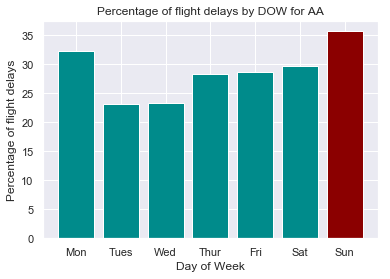

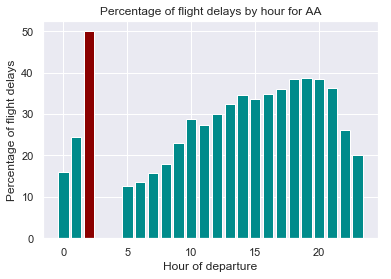

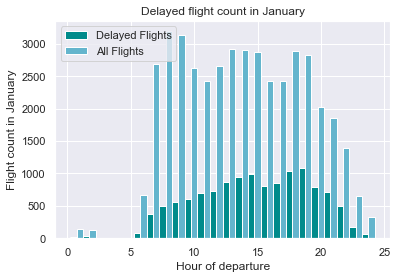

In [316]:
data = (AA_flights_J[AA_flights_J.DEPARTURE_DELAY > 5].DEPARTURE_DELAY.groupby(AA_flights_J['DOW']).count()/AA_flights_J.DEPARTURE_DELAY.groupby(AA_flights_J['DOW']).count())*100
fig, ax = plt.subplots()
plt.bar(data.index, data.values, color = ['darkred' if i == np.argmax(data) else 'darkcyan' for i in data.index])
ax.set_xticks(range(7))
ax.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week')
plt.ylabel('Percentage of flight delays')
plt.title('Percentage of flight delays by DOW for AA')
plt.show()

data = (AA_flights_J[AA_flights_J.DEPARTURE_DELAY > 5].DEPARTURE_DELAY.groupby(AA_flights_J['HOUR']).count()/AA_flights_J.DEPARTURE_DELAY.groupby(AA_flights_J['HOUR']).count())*100
fig, ax = plt.subplots()
plt.bar(data.index, data.values, color = ['darkred' if i == np.argmax(data) else 'darkcyan' for i in data.index])
plt.xlabel('Hour of departure')
plt.ylabel('Percentage of flight delays')
plt.title('Percentage of flight delays by hour for AA')
plt.show()

data_1 = AA_flights_J[AA_flights_J.DEPARTURE_DELAY > 5].DEPARTURE_DELAY.groupby(AA_flights_J['HOUR']).count()
data_2 = AA_flights_J.DEPARTURE_DELAY.groupby(AA_flights_J['HOUR']).count()
width = .5
fig, ax = plt.subplots()
delayed = ax.bar(data_1.index + width, data_1.values, width,  color = ['darkcyan' for i in data_1.index], label = 'Delayed Flights')
all_flights = ax.bar(data_2.index + width + .5, data_2.values, width, color = ['c' for i in data_2.index], label = 'All Flights')
ax.legend()
plt.xlabel('Hour of departure')
plt.ylabel('Flight count in January')
plt.title('Delayed flight count in January')
plt.show()

In [145]:
UA_flights_J = flights_J[flights_J.AIRLINE == 'UA']
UA_flights_J.head()

,AIRLINE,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME
17,UA,SFO,2015-01-01 00:48:00,00:42:00,-6.0,06:26:00,06:19:00,-7.0,218.0,217.0
25,UA,LAX,2015-01-01 01:15:00,01:12:00,-3.0,06:18:00,06:07:00,-11.0,183.0,175.0
37,UA,SJU,2015-01-01 01:54:00,01:57:00,3.0,05:09:00,04:58:00,-11.0,255.0,241.0
49,UA,BQN,2015-01-01 02:59:00,02:58:00,-1.0,05:59:00,06:05:00,6.0,240.0,247.0
63,UA,ORD,2015-01-01 05:10:00,05:14:00,4.0,08:05:00,08:16:00,11.0,175.0,182.0


In [146]:
UA_flights_J['DOW'] = UA_flights_J.SCHEDULED_DEPARTURE.dt.dayofweek
UA_flights_J['HOUR'] = UA_flights_J.SCHEDULED_DEPARTURE.dt.hour
UA_flights_J.head()

/Applications/anaconda3/envs/testbm2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/envs/testbm2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,AIRLINE,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DOW,HOUR
17,UA,SFO,2015-01-01 00:48:00,00:42:00,-6.0,06:26:00,06:19:00,-7.0,218.0,217.0,3,0
25,UA,LAX,2015-01-01 01:15:00,01:12:00,-3.0,06:18:00,06:07:00,-11.0,183.0,175.0,3,1
37,UA,SJU,2015-01-01 01:54:00,01:57:00,3.0,05:09:00,04:58:00,-11.0,255.0,241.0,3,1
49,UA,BQN,2015-01-01 02:59:00,02:58:00,-1.0,05:59:00,06:05:00,6.0,240.0,247.0,3,2
63,UA,ORD,2015-01-01 05:10:00,05:14:00,4.0,08:05:00,08:16:00,11.0,175.0,182.0,3,5


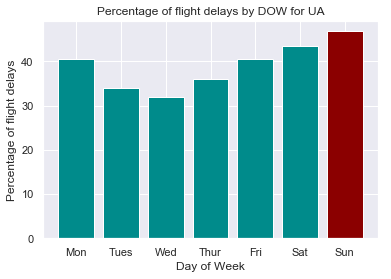

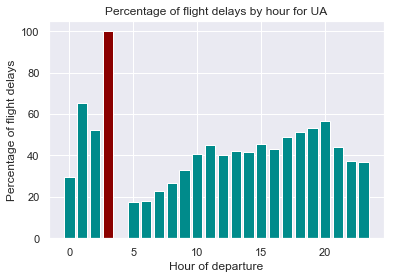

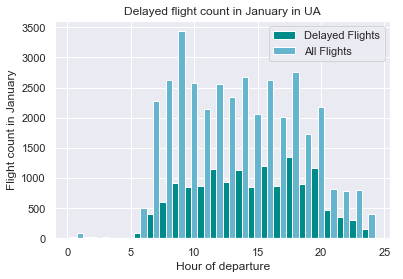

In [315]:
data = (UA_flights_J[UA_flights_J.DEPARTURE_DELAY > 5].DEPARTURE_DELAY.groupby(UA_flights_J['DOW']).count()/UA_flights_J.DEPARTURE_DELAY.groupby(UA_flights_J['DOW']).count())*100
fig, ax = plt.subplots()
plt.bar(data.index, data.values, color = ['darkred' if i == np.argmax(data) else 'darkcyan' for i in data.index])
ax.set_xticks(range(7))
ax.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week')
plt.ylabel('Percentage of flight delays')
plt.title('Percentage of flight delays by DOW for UA')
plt.show()

data = (UA_flights_J[UA_flights_J.DEPARTURE_DELAY > 5].DEPARTURE_DELAY.groupby(UA_flights_J['HOUR']).count()/UA_flights_J.DEPARTURE_DELAY.groupby(UA_flights_J['HOUR']).count())*100
fig, ax = plt.subplots()
plt.bar(data.index, data.values, color = ['darkred' if i == np.argmax(data) else 'darkcyan' for i in data.index])
plt.xlabel('Hour of departure')
plt.ylabel('Percentage of flight delays')
plt.title('Percentage of flight delays by hour for UA')
plt.show()

data_1 = UA_flights_J[UA_flights_J.DEPARTURE_DELAY > 5].DEPARTURE_DELAY.groupby(UA_flights_J['HOUR']).count()
data_2 = UA_flights_J.DEPARTURE_DELAY.groupby(UA_flights_J['HOUR']).count()
width = .5
fig, ax = plt.subplots()
delayed = ax.bar(data_1.index + width, data_1.values, width,  color = ['darkcyan' for i in data_1.index], label = 'Delayed Flights')
all_flights = ax.bar(data_2.index + width + .5, data_2.values, width, color = ['c' for i in data_2.index], label = 'All Flights')
ax.legend()
plt.xlabel('Hour of departure')
plt.ylabel('Flight count in January')
plt.title('Delayed flight count in January in UA')
plt.show()

In [311]:
F9_flights_J = flights_J[flights_J.AIRLINE == 'F9']
F9_flights_J['DOW'] = F9_flights_J.SCHEDULED_DEPARTURE.dt.dayofweek
F9_flights_J['HOUR'] = F9_flights_J.SCHEDULED_DEPARTURE.dt.hour
F9_flights_J.head()

/Applications/anaconda3/envs/testbm2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/envs/testbm2/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AIRLINE,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DOW,HOUR
88,F9,PHL,2015-01-01 05:30:00,05:26:00,-4.0,08:10:00,07:52:00,-18.0,160.0,146.0,3,5
114,F9,MSN,2015-01-01 05:44:00,05:34:00,-10.0,07:09:00,06:58:00,-11.0,145.0,144.0,3,5
126,F9,MKE,2015-01-01 05:45:00,06:21:00,36.0,07:26:00,07:43:00,17.0,161.0,142.0,3,5
127,F9,MSP,2015-01-01 05:45:00,05:38:00,-7.0,06:54:00,06:46:00,-8.0,129.0,128.0,3,5
297,F9,MSO,2015-01-01 06:00:00,NaN,NaN,08:00:00,NaN,NaN,120.0,NaN,3,6


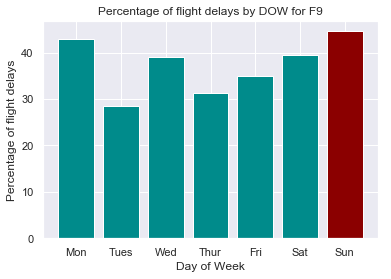

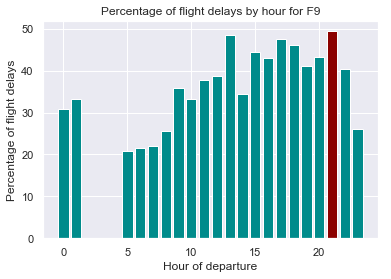

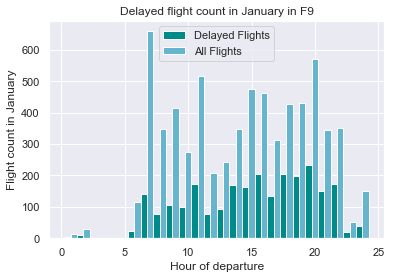

In [314]:
data = (F9_flights_J[F9_flights_J.DEPARTURE_DELAY > 5].DEPARTURE_DELAY.groupby(F9_flights_J['DOW']).count()/F9_flights_J.DEPARTURE_DELAY.groupby(F9_flights_J['DOW']).count())*100
fig, ax = plt.subplots()
plt.bar(data.index, data.values, color = ['darkred' if i == np.argmax(data) else 'darkcyan' for i in data.index])
ax.set_xticks(range(7))
ax.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week')
plt.ylabel('Percentage of flight delays')
plt.title('Percentage of flight delays by DOW for F9')
plt.show()

data = (F9_flights_J[F9_flights_J.DEPARTURE_DELAY > 5].DEPARTURE_DELAY.groupby(F9_flights_J['HOUR']).count()/F9_flights_J.DEPARTURE_DELAY.groupby(F9_flights_J['HOUR']).count())*100
fig, ax = plt.subplots()
plt.bar(data.index, data.values, color = ['darkred' if i == np.argmax(data) else 'darkcyan' for i in data.index])
plt.xlabel('Hour of departure')
plt.ylabel('Percentage of flight delays')
plt.title('Percentage of flight delays by hour for F9')
plt.show()

data_1 = F9_flights_J[F9_flights_J.DEPARTURE_DELAY > 5].DEPARTURE_DELAY.groupby(F9_flights_J['HOUR']).count()
data_2 = F9_flights_J.DEPARTURE_DELAY.groupby(F9_flights_J['HOUR']).count()
width = .5
fig, ax = plt.subplots()
delayed = ax.bar(data_1.index + width, data_1.values, width,  color = ['darkcyan' for i in data_1.index], label = 'Delayed Flights')
all_flights = ax.bar(data_2.index + width + .5, data_2.values, width, color = ['c' for i in data_2.index], label = 'All Flights')
ax.legend()
plt.xlabel('Hour of departure')
plt.ylabel('Flight count in January')
plt.title('Delayed flight count in January in F9')
plt.show()

In [340]:
def delay_level(delay):
    if delay > 45: 
        return 2
    elif delay > 5: 
        return 1
    else: 
        return 0

flights_J['DEPARTURE_DELAY'] = flights_J['DEPARTURE_DELAY'].fillna(0)
flights_J['DELAY_LEVEL'] = flights_J.apply(lambda x: delay_level(int(x["DEPARTURE_DELAY"])), axis = 1)

In [361]:
y_labels = [airline_codes[i.get_text()] for i in ax.get_yticklabels()]
y_labels

['Alaska Airlines Inc.',
 'American Airlines Inc.',
 'US Airways Inc.',
 'Delta Air Lines Inc.',
 'Spirit Air Lines',
 'United Air Lines Inc.',
 'Hawaiian Airlines Inc.',
 'JetBlue Airways',
 'Skywest Airlines Inc.',
 'Atlantic Southeast Airlines',
 'American Eagle Airlines Inc.',
 'Frontier Airlines Inc.',
 'Southwest Airlines Co.',
 'Virgin America']

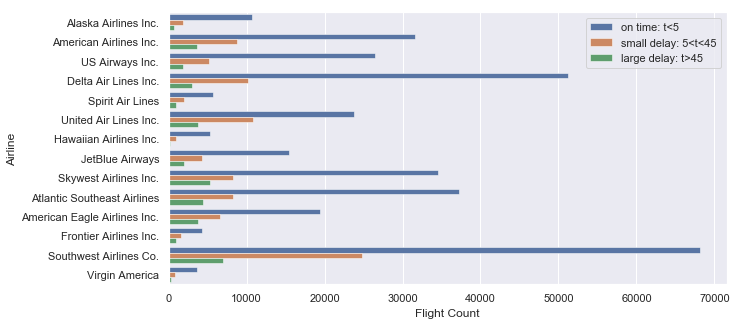

In [381]:
fig, ax = plt.subplots(figsize = (10, 5))
sn.countplot(y="AIRLINE", hue = "DELAY_LEVEL", data=flights_J, linewidth = 0.5)
y_labels = [airline_codes[i.get_text()] for i in ax.get_yticklabels()]
ax.set_yticklabels(y_labels)

plt.xlabel('Flight Count')
plt.ylabel('Airline')

L = plt.legend()
L.get_texts()[0].set_text('on time: t<5')
L.get_texts()[1].set_text('small delay: 5<t<45')
L.get_texts()[2].set_text('large delay: t>45')

plt.show()

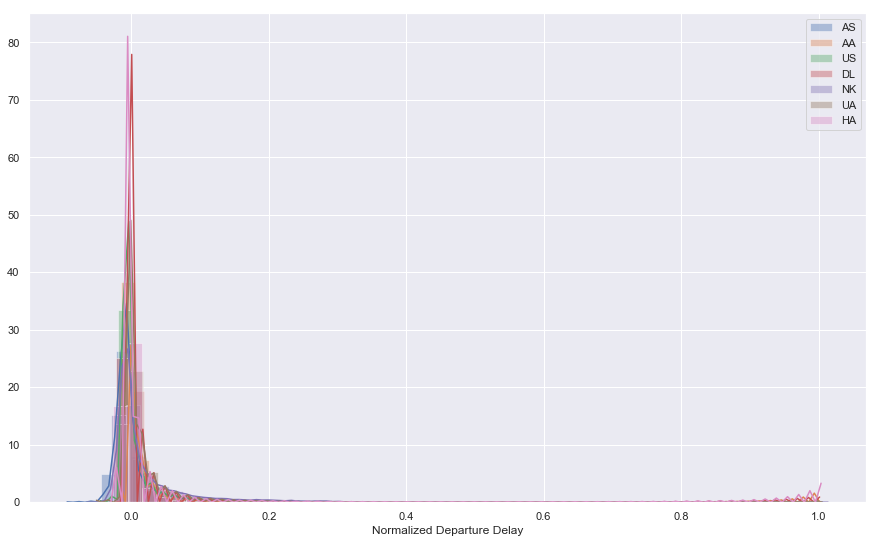

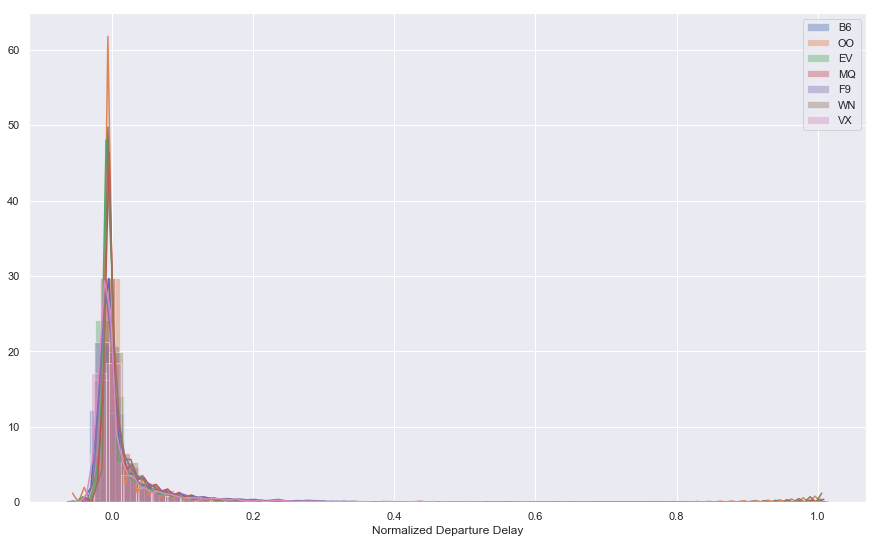

In [413]:
def normalize(max_val, delay):
    return int(delay)/int(max_val)

fig, ax = plt.subplots(figsize = (15, 9))
for i in flights_J.AIRLINE.unique()[:7]:
    data = flights_J[flights_J.AIRLINE == i]
    max_delay = max(data.DEPARTURE_DELAY)
    norm = data.apply(lambda x: normalize(max_delay, x.DEPARTURE_DELAY), axis = 1)
    sn.distplot(norm, label = i)

plt.xlabel('Normalized Departure Delay')
#plt.axis([-50, 50, 0, .08])
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize = (15, 9))
for i in flights_J.AIRLINE.unique()[7:14]:
    data = flights_J[flights_J.AIRLINE == i]
    max_delay = max(data.DEPARTURE_DELAY)
    norm = data.apply(lambda x: normalize(max_delay, x.DEPARTURE_DELAY), axis = 1)
    sn.distplot(norm, label = i)

plt.xlabel('Normalized Departure Delay')
#plt.axis([-50, 50, 0, .08])
plt.legend()
plt.show()


In [416]:
flights_J.head()

,AIRLINE,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,DELAY_LEVEL
0,AS,ANC,2015-01-01 00:05:00,23:54:00,-11.0,04:30:00,04:08:00,-22.0,205.0,194.0,0
1,AA,LAX,2015-01-01 00:10:00,00:02:00,-8.0,07:50:00,07:41:00,-9.0,280.0,279.0,0
2,US,SFO,2015-01-01 00:20:00,00:18:00,-2.0,08:06:00,08:11:00,5.0,286.0,293.0,0
3,AA,LAX,2015-01-01 00:20:00,00:15:00,-5.0,08:05:00,07:56:00,-9.0,285.0,281.0,0
4,AS,SEA,2015-01-01 00:25:00,00:24:00,-1.0,03:20:00,02:59:00,-21.0,235.0,215.0,0


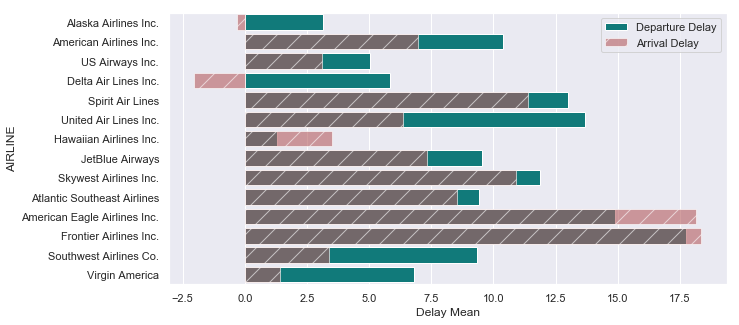

In [429]:
flights_J.head()

fig, ax = plt.subplots(figsize = (10, 5))
sn.barplot(x = 'DEPARTURE_DELAY', y = 'AIRLINE', data = flights_J, color = 'darkcyan', ci = None, label = 'Departure Delay')
sn.barplot(x = 'ARRIVAL_DELAY', y = 'AIRLINE', data = flights_J, color="r", hatch = '/', alpha = 0.6, ci = None, label = 'Arrival Delay')
y_labels = [airline_codes[i.get_text()] for i in ax.get_yticklabels()]
plt.xlabel('Delay Mean')
ax.set_yticklabels(y_labels)
plt.legend()
plt.show()

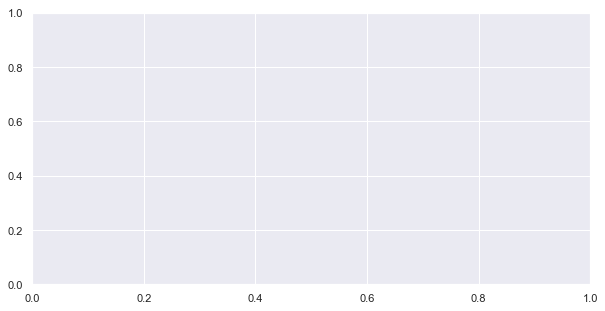

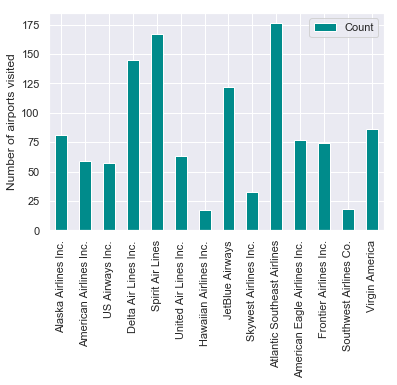

In [493]:
data = dict()
for key,val in flights_J.ORIGIN_AIRPORT.groupby(flights_J.AIRLINE).unique().items():
    data[key] = len(val)
data = pd.DataFrame.from_dict(data, orient = 'index')
data.columns = ['Count']

fig,ax = plt.subplots(figsize = (10, 5))
ax = data.plot(kind='bar', color = 'darkcyan')
ax.set_xticklabels(y_labels)
plt.ylabel('Number of airports visited')
plt.show()